<a href="https://colab.research.google.com/github/debangeedas/SEM/blob/main/Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scanpy
import urllib
import scanpy

urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

adata = scanpy.read_h5ad('dataset.h5ad')
print(adata)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.3 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=4e26e01aa50de0533a6eadf7b43ccd5bbaea8850a50f7028b9d6b43fbd8b60d3
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeatur

In [2]:
obs_attributes = adata.obs.columns.tolist()  # List of obs attributes
var_attributes = adata.var.columns.tolist()  # List of var attributes

print("Obs attributes:", obs_attributes)
print("Var attributes:", var_attributes)

Obs attributes: ['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid']
Var attributes: ['feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type']


In [2]:
# Filter the annData to only include APOE, APP, PSEN1, PSEN2, TREM2, CLU, PICALM, BIN1, CR1, SORL1 genes
genes_of_interest = ['APOE', 'APP', 'PSEN1', 'PSEN2', 'TREM2', 'CLU', 'PICALM', 'BIN1', 'CR1', 'SORL1']
adata_slice_genes = adata[:,adata.var['feature_name'].isin(genes_of_interest)]
print(adata_slice_genes)

View of AnnData object with n_obs × n_vars = 23197 × 10
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


In [5]:
unique_feature_names = adata_slice_genes.var['feature_name'].unique().tolist()
print("Unique feature names:", unique_feature_names)

Unique feature names: ['SORL1', 'PSEN2', 'APP', 'PSEN1', 'BIN1', 'TREM2', 'PICALM', 'CLU', 'CR1', 'APOE']


In [3]:
# Get gene id mapping to its name
if 'feature_name' in adata.var.columns:
    gene_ids = adata.var.index
    gene_names = adata.var['feature_name']

gene_mapping = dict(zip(gene_ids, gene_names))
print(gene_mapping.values())
print("Total number of gene_ids:", len(gene_mapping.keys()))

required_gene_names = ['SORL1', 'PSEN2', 'APP', 'PSEN1', 'BIN1', 'TREM2', 'PICALM', 'CLU', 'CR1', 'APOE']
for gene_id, gene_name in list(gene_mapping.items()):
  if gene_name in required_gene_names or gene_name.startswith("RP11-"):
    print(f"Gene ID: {gene_id}, Gene Name: {gene_name}")

dict_values(['ENSG00000278915.1', 'TXNDC2', 'NDUFA9', 'ENSG00000229177.1', 'C6orf136', 'GADD45A', 'SPON1-AS1', 'EFCC1', 'ENSG00000257894.2', 'TMEM207', 'CD82', 'G2E3', 'GPR142', 'ITPA', 'MGMT', 'ENSG00000231662.1', 'NLRC5', 'ENSG00000261198.1', 'DBX2', 'WIPF2', 'KCTD4', 'OR4S2', 'KDR', 'ENSG00000272564.1', 'ENSG00000270000.1', 'ENSG00000267683.1', 'CENPJ', 'MGAM', 'TNP2', 'ENSG00000251665.1', 'LINC01919', 'ZBTB26', 'WDR41', 'LINC02795', 'TRHDE', 'RAB11FIP4', 'MNX1', 'LINC01410', 'RLBP1', 'RASL10B', 'ZNF429', 'ENSG00000249776.5', 'GYPB', 'TMEM273', 'OLFML2B', 'GRXCR1', 'CDK16', 'ENSG00000256250.1', 'ENSG00000247121.8', 'SMARCAD1', 'MLF2', 'ENSG00000282772.1', 'PLPPR4', 'ENSG00000253266.1', 'ZNRF1', 'H2AC11', 'ENSG00000260683.1', 'LINC02204', 'SLC22A14', 'L3MBTL1', 'NOTCH2', 'ANKRD44', 'SHANK2-AS2', 'FSCN1', 'LINC01732', 'BAP1', 'GDPD2', 'TNNI3K', 'ZNF7', 'HIBADH', 'NXF5', 'ENSG00000273204.1', 'TRDV3', 'SLC26A3', 'RPUSD1', 'C16orf87', 'IGKV1-37', 'IGLVVI-22-1', 'ENSG00000237316.1', 'ZNF7

In [7]:
# prompt: divide adata into two for the two types of 'disease' - 'Alzheimer disease', 'normal'

adata_alzheimer = adata[adata.obs['disease'] == 'Alzheimer disease', :].copy()
adata_normal = adata[adata.obs['disease'] == 'normal', :].copy()

print(f"adata_alzheimer shape: {adata_alzheimer.shape}")
print(f"adata_normal shape: {adata_normal.shape}")

adata_alzheimer shape: (11733, 33091)
adata_normal shape: (11464, 33091)


In [9]:
# prompt: verify the unique values of disease for both the datasets

print("Unique diseases in adata_alzheimer:", adata_alzheimer.obs['disease'].unique())
print("Unique diseases in adata_normal:", adata_normal.obs['disease'].unique())

Unique diseases in adata_alzheimer: ['Alzheimer disease']
Categories (1, object): ['Alzheimer disease']
Unique diseases in adata_normal: ['normal']
Categories (1, object): ['normal']


<ipython-input-21-fb44c9cbd1ae>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_expression = expression_matrix.groupby(adata.obs['Cell.Types']).mean()


Cell.Types  In1_LHX6-PVALB  In2_LHX6-PVALB-Chandelier  In3_LHX6-SST  \
SORL1             0.451116                   0.983225      0.310375   
PSEN2             0.039094                   0.045027      0.015962   
APP               1.363113                   1.675621      1.252021   
PSEN1             0.162639                   0.121696      0.205904   
BIN1              0.518419                   0.442697      0.509174   
TREM2             0.000000                   0.000000      0.001592   
PICALM            0.528409                   0.445793      0.368428   
CLU               0.822979                   0.749428      0.875557   
CR1               0.002130                   0.004608      0.005603   
APOE              0.040098                   0.048734      0.029314   

Cell.Types  In4_LHX6-SST-NPY  In5_LHX6-ADARB2-LAMP5  In6_ADARB2-LAMP5  \
SORL1               0.265696               0.491616          0.395225   
PSEN2               0.054233               0.044894          0.027523   

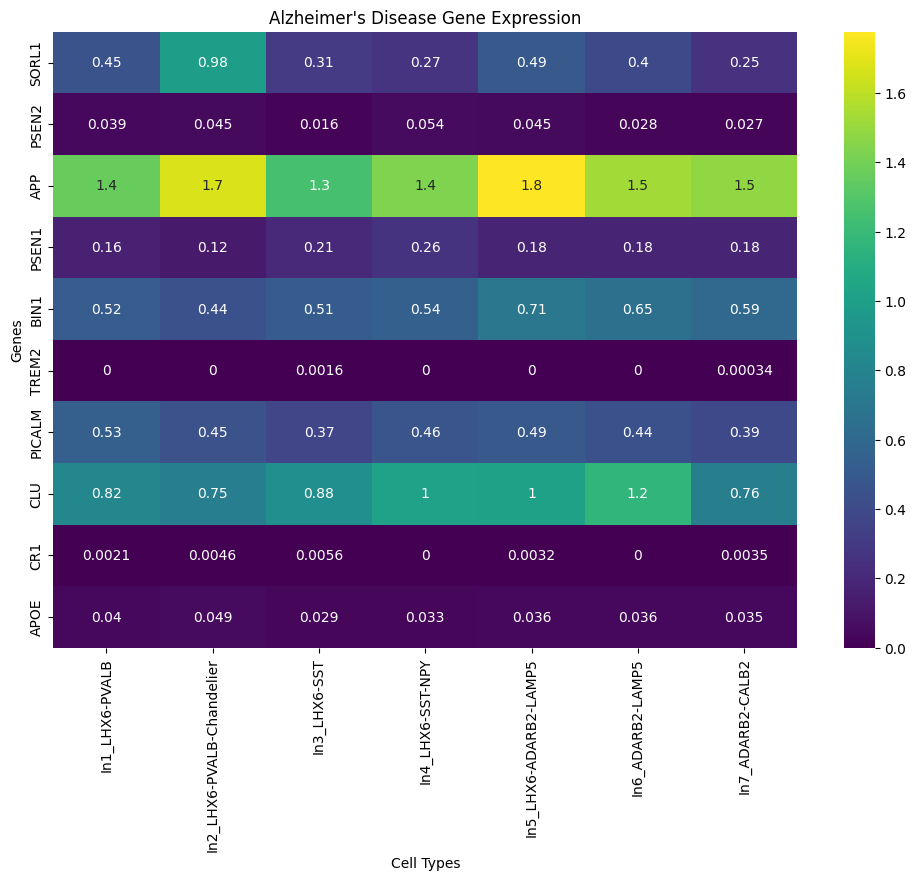

<ipython-input-21-fb44c9cbd1ae>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_expression = expression_matrix.groupby(adata.obs['Cell.Types']).mean()


Cell.Types  In1_LHX6-PVALB  In2_LHX6-PVALB-Chandelier  In3_LHX6-SST  \
SORL1             0.594873                   1.245545      0.402063   
PSEN2             0.061144                   0.066276      0.032391   
APP               1.624452                   1.693796      1.447750   
PSEN1             0.251034                   0.231504      0.255965   
BIN1              0.473878                   0.403316      0.470004   
TREM2             0.000000                   0.000000      0.000000   
PICALM            0.644973                   0.408531      0.529509   
CLU               0.654851                   0.549778      0.680785   
CR1               0.001791                   0.000000      0.003257   
APOE              0.024396                   0.007748      0.029844   

Cell.Types  In4_LHX6-SST-NPY  In5_LHX6-ADARB2-LAMP5  In6_ADARB2-LAMP5  \
SORL1               0.455513               0.606848          0.510639   
PSEN2               0.051384               0.063429          0.040143   

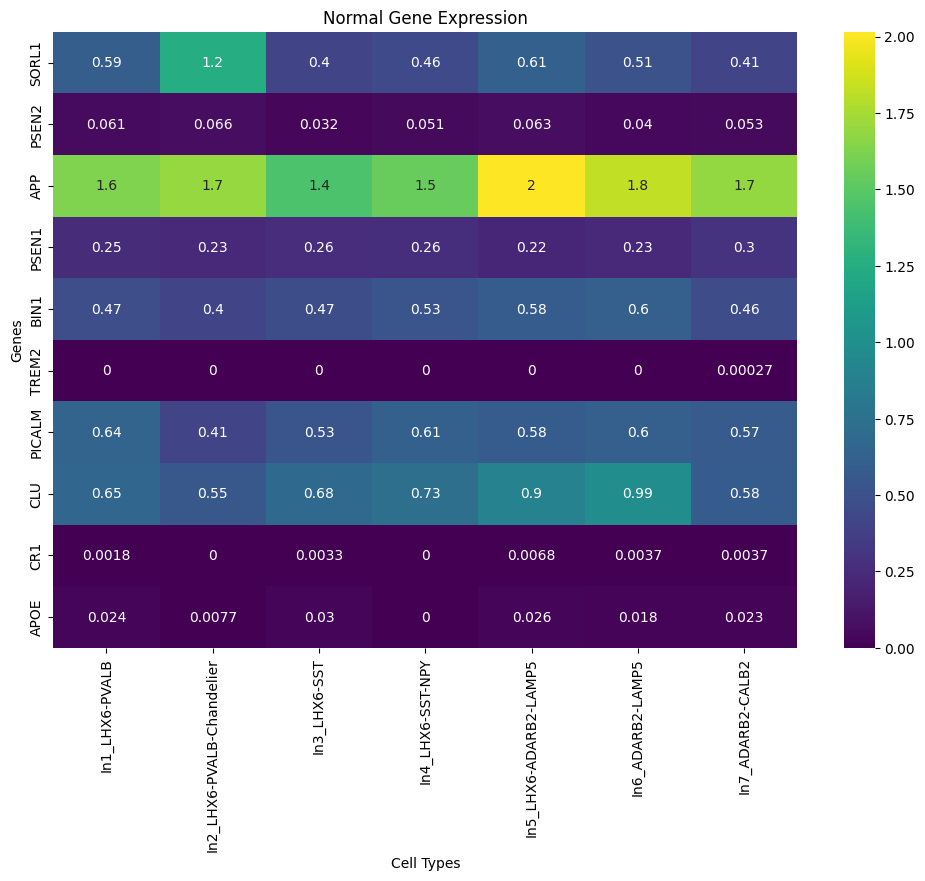

In [21]:
# prompt: for both the datasets, plot a heatmap that depicts the amount of gene expression of each of these genes for each 'Cell.Types' and print a matrix for the same. display the feature_name using the dict gene_mapping from above

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_heatmap_and_matrix(adata, title):
  """Plots a heatmap and prints a matrix of gene expression for a given adata object."""

  # Create a matrix of gene expression values
  expression_matrix = adata.to_df()
  # Filter to only include genes of interest
  expression_matrix = expression_matrix[[gene_id for gene_id, gene_name in gene_mapping.items() if gene_name in required_gene_names]]

  # Group by cell type and calculate the average expression for each gene
  grouped_expression = expression_matrix.groupby(adata.obs['Cell.Types']).mean()
  # Transpose the matrix so that genes are represented by rows and cell types by columns
  matrix = grouped_expression.T
  # Rename rows using gene mapping
  matrix = matrix.rename(index={gene_id: gene_mapping[gene_id] for gene_id in matrix.index})
  # Print the matrix
  print(matrix)

  # Create a heatmap of gene expression
  plt.figure(figsize=(12, 8))
  sns.heatmap(matrix, annot=True, cmap="viridis")
  plt.title(title)
  plt.xlabel("Cell Types")
  plt.ylabel("Genes")
  plt.show()

# Plot heatmaps and matrices for both datasets
plot_heatmap_and_matrix(adata_alzheimer, "Alzheimer's Disease Gene Expression")
plot_heatmap_and_matrix(adata_normal, "Normal Gene Expression")


In [22]:
# prompt: create two sub datasets from adata where donor_id = 'Subject8' for one and donor_id = 'CTRL-1' for the other

adata_subject8 = adata[adata.obs['donor_id'] == 'Subject8', :].copy()
adata_ctrl1 = adata[adata.obs['donor_id'] == 'CTRL-1', :].copy()

In [23]:
# prompt: verify the unique values of donor_id for the above two datasets

print("Unique donor IDs in adata_subject8:", adata_subject8.obs['donor_id'].unique())
print("Unique donor IDs in adata_ctrl1:", adata_ctrl1.obs['donor_id'].unique())

# Verify if the unique donor IDs are the same as intended.
# It should show 'Subject8' and 'CTRL-1' respectively.

Unique donor IDs in adata_subject8: ['Subject8']
Categories (1, object): ['Subject8']
Unique donor IDs in adata_ctrl1: ['CTRL-1']
Categories (1, object): ['CTRL-1']


<ipython-input-21-fb44c9cbd1ae>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_expression = expression_matrix.groupby(adata.obs['Cell.Types']).mean()


Cell.Types  In1_LHX6-PVALB  In2_LHX6-PVALB-Chandelier  In3_LHX6-SST  \
SORL1             0.362468                   0.981591      0.210192   
PSEN2             0.024326                   0.076112      0.011826   
APP               1.166541                   1.694721      1.067501   
PSEN1             0.177474                   0.169314      0.165074   
BIN1              0.556165                   0.525682      0.508640   
TREM2             0.000000                   0.000000      0.000000   
PICALM            0.443115                   0.393585      0.240871   
CLU               0.627521                   0.623814      0.789247   
CR1               0.000000                   0.009507      0.000000   
APOE              0.051165                   0.065551      0.033647   

Cell.Types  In4_LHX6-SST-NPY  In5_LHX6-ADARB2-LAMP5  In6_ADARB2-LAMP5  \
SORL1               0.000000               0.603946          0.405877   
PSEN2               0.000000               0.048913          0.031288   

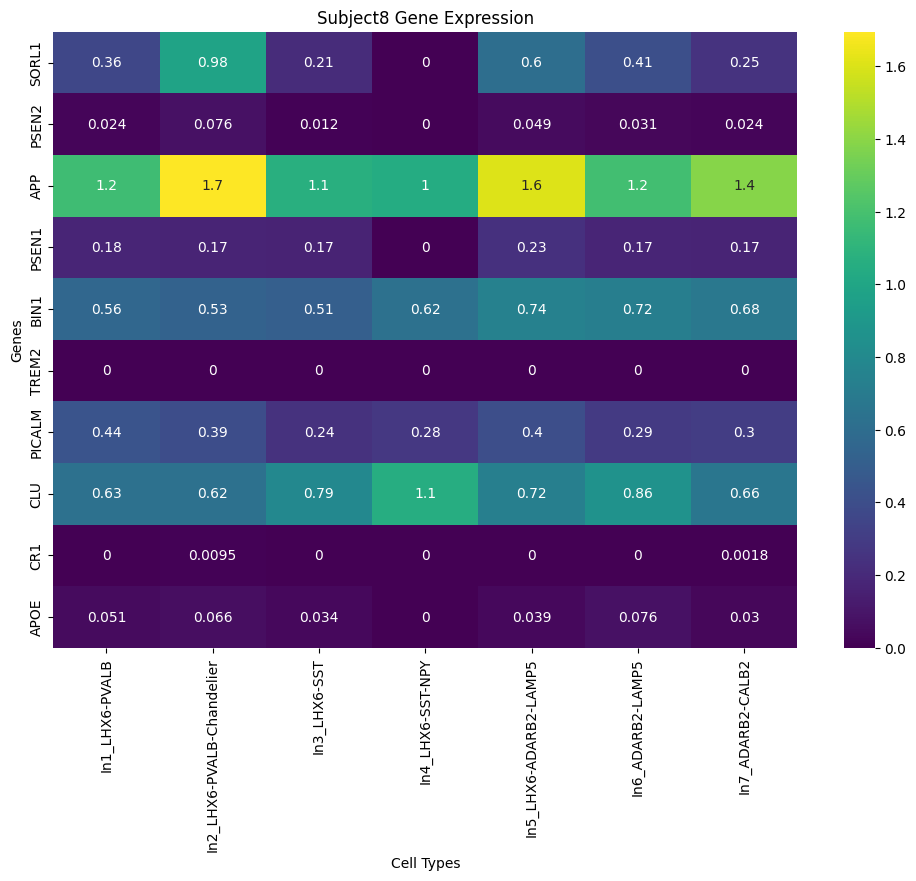

<ipython-input-21-fb44c9cbd1ae>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_expression = expression_matrix.groupby(adata.obs['Cell.Types']).mean()


Cell.Types  In1_LHX6-PVALB  In2_LHX6-PVALB-Chandelier  In3_LHX6-SST  \
SORL1             0.685880                   1.227846      0.539973   
PSEN2             0.102432                   0.061044      0.041401   
APP               1.783010                   1.663377      1.500854   
PSEN1             0.188334                   0.165111      0.148802   
BIN1              0.713202                   0.477471      0.742845   
TREM2             0.000000                   0.000000      0.000000   
PICALM            0.566630                   0.355865      0.375275   
CLU               1.243631                   0.841026      1.091938   
CR1               0.000000                   0.000000      0.006746   
APOE              0.019063                   0.017743      0.048613   

Cell.Types  In4_LHX6-SST-NPY  In5_LHX6-ADARB2-LAMP5  In6_ADARB2-LAMP5  \
SORL1               0.331329               0.704743          0.571200   
PSEN2               0.000000               0.045475          0.081827   

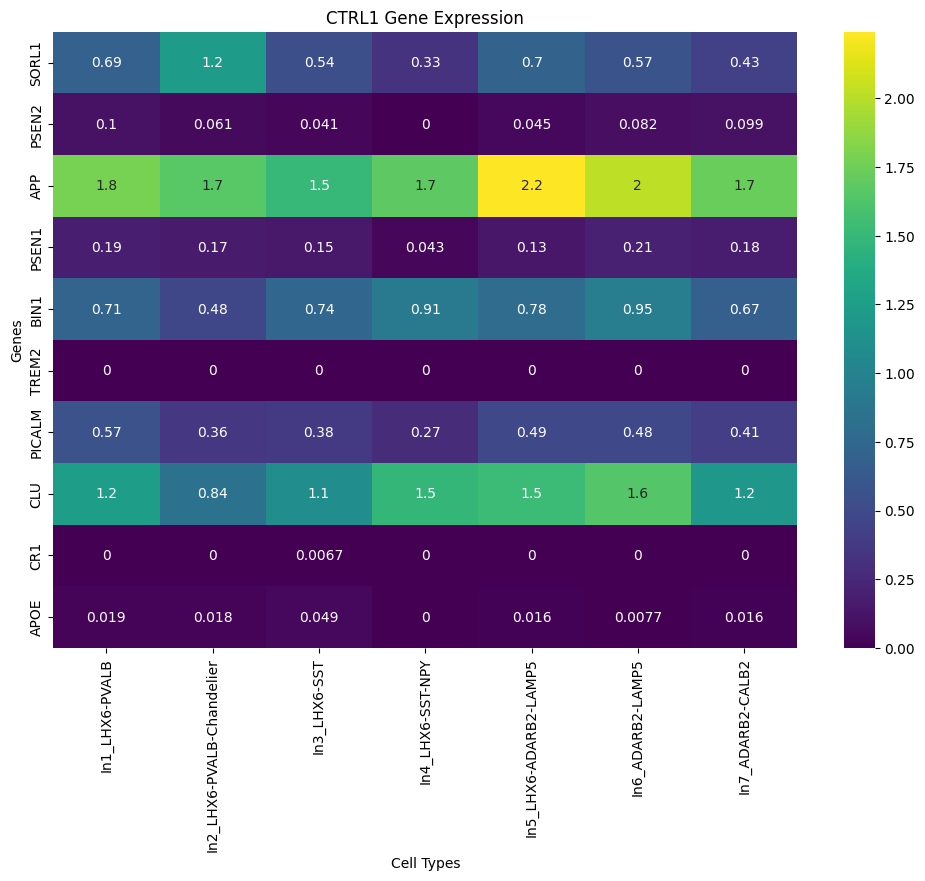

In [25]:
# Plot heatmaps and matrices for both datasets
plot_heatmap_and_matrix(adata_subject8, "Subject8 Gene Expression")
plot_heatmap_and_matrix(adata_ctrl1, "CTRL1 Gene Expression")